# Speed benchmarks



## FastKDE is fast on 1D data

*BLUF: FastKDE lives up to its name on 1-D data, while CADE is slow*

We'll test some density estimators on the Bart Simpson density:

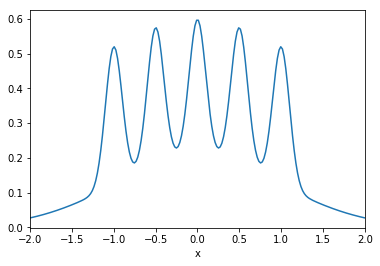

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pydens
from time import time

bart_simpson = pydens.simulators.BartSimpson()
bart_simpson.plot()

Generate several samples of increasing size:

In [2]:
samples = [bart_simpson.rvs(n) for n in [100, 1000, 10000, 100000, 1000000]]

Execution time for training:

In [16]:
def time_train(df):
    estimators = {
        'CADE': pydens.cade.Cade(sim_size=df.shape[0]),
        'FastKDE': pydens.wrappers.FastKDE(),
        'SklearnKDE': pydens.wrappers.SklearnKDE(),
        'IsolationForest': pydens.wrappers.SklearnIsolationForest()
    }
    times = {}
    for kind, estimator in estimators.items():
        t0 = time()
        estimator.train(df)
        times[kind] = time()-t0
    return times

results = [time_train(s) for s in samples]
rdf = pd.DataFrame(results)
rdf['sample_size'] = [s.shape[0] for s in samples]
rdf

,CADE,FastKDE,IsolationForest,SklearnKDE,sample_size
0,0.043433,0.002997,0.049505,0.000223,100
1,0.171731,0.003066,0.059153,0.000290,1000
2,2.132012,0.008606,0.080857,0.002365,10000
3,2.346975,0.062498,0.122864,0.102925,100000
4,6.000147,0.581835,0.788735,3.729898,1000000


## Kernel density methods fail at  > 2D

TODO: test this claim

## CADE is fast on high-dimensional data

TODO: test this claim